In [7]:
import predictor_of_investment_helper_methods as hm
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
## Extract fyts for multiple lines 

case = "9n_mod1"

## FYMILP/FYWOI
if case == "IEEE118_mod1": 
    df_cost_FYMILP = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc400/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc400.csv")
else:
    df_cost_FYMILP = pd.read_csv(f"A.The_full_year_MILP/{case}/3.Out/oT_Result_CostSummary_{case}.csv")


df_cost_FYWOI = pd.read_csv(f"A.The_full_year_MILP/{case}/4.OutWoInv/oT_Result_CostSummary_{case}.csv")
df_curts_FY = hm.get_curts_FYWOI(case)
ts_curts_FY = hm.sum_curts_per_timestep_FYWOI(df_curts_FY)


all_utils_FYWOI = hm.get_utils_FYWOI(case)

all_line_flows_FYWOI = hm.get_line_flows_FYWOI(case)


### Arrays for data
cost_devs,curt_devs,util_devs,line_flow_devs = [],[],[],[]
cms_v, nbcs_v = [],[]


additional_costs = {}

for cm in ["R&D","CHI","OPT_LB","HI","OPC"]:
    #for nbc in [10,20,30,40,50,60,70,80,90,100,150,200]:
    for nbc in [10,20,50,100,200]:
        cms_v.append(cm)
        nbcs_v.append(nbc)
        
        #TSC deviation 
        total_cost_diff = hm.get_total_cost_diff_with_FYFixedInv(df_cost_FYMILP,cm,nbc,case)
        cost_devs.append(total_cost_diff/df_cost_FYMILP.iloc[0,2])
        
        #Curtailment deviation 
        ts_curts_CM_per_gen = hm.get_curts_cm(cm,nbc,case)
        ts_curts_CM = hm.sum_curts_per_timestep_cm(ts_curts_CM_per_gen)
        abs_curt_dev = np.sum(np.abs(ts_curts_CM -ts_curts_FY))/np.sum(ts_curts_FY)
        curt_dev = np.sum(ts_curts_CM -ts_curts_FY)/np.sum(ts_curts_FY)

        
        curt_devs.append(abs_curt_dev)
        
        #Line flow deviation 
        array_all_line_flows_cm,array_all_line_flows_FYWOI = hm.get_line_flow_arrays(all_line_flows_FYWOI,cm,nbc,case)
        ts_line_flow_diffs = array_all_line_flows_cm-array_all_line_flows_FYWOI
        abs_line_flow_dev = np.sum(np.abs(ts_line_flow_diffs)) / np.abs(all_line_flows_FYWOI["GWh"]).sum()
        
        line_flow_devs.append(abs_line_flow_dev)
        
        
        #Utilization deviation
        ts_util_diffs = hm.get_util_diffs(all_utils_FYWOI,cm,nbc,case)
        print(ts_util_diffs.shape)
        abs_util_dev = np.sum(np.abs(ts_util_diffs)) / all_utils_FYWOI["GWh"].sum()
        util_dev = np.sum(ts_util_diffs) / all_utils_FYWOI["GWh"].sum()
        
        util_devs.append(abs_util_dev)
        
        
        #Some cost components 
        cost_diffs = hm.get_cost_diffs_FYWOI(df_cost_FYWOI,cm,nbc,case)
        
        # Add each value in cost_diffs to the dictionary using column names as keys
        for key in cost_diffs.index:
            if key not in additional_costs:
                additional_costs[key] = []
            additional_costs[key].append(np.abs(cost_diffs[key]))

    
        


df = pd.DataFrame({"CM":cms_v,
                   "nbc":nbcs_v,
                   "Cost dev":cost_devs,
                   "Total dev curt":curt_devs,
                  "Total dev util":util_devs,
                   "Total dev line flows": line_flow_devs
                   })

# Add the additional cost components to the DataFrame
for key, values in additional_costs.items():
    df[key] = values
#df.to_csv(f"Z.Figures/Predictors/predictors_{case}.csv")
df.to_csv(f"Z.Figures/Predictors/predictors_{case}.csv")

Considering 12 lines 
Considering 12 lines 
(15760,)
Considering 12 lines 
Considering 12 lines 
(14539,)
Considering 12 lines 
Considering 12 lines 
(14485,)
Considering 12 lines 
Considering 12 lines 
(13979,)
Considering 12 lines 
Considering 12 lines 
(14123,)
Considering 12 lines 
Considering 12 lines 
(18343,)
Considering 12 lines 
Considering 12 lines 
(16525,)
Considering 12 lines 
Considering 12 lines 
(16170,)
Considering 12 lines 
Considering 12 lines 
(13724,)
Considering 12 lines 
Considering 12 lines 
(13938,)
Considering 12 lines 
Considering 12 lines 
(18333,)
Considering 12 lines 
Considering 12 lines 
(15105,)
Considering 12 lines 
Considering 12 lines 
(13579,)
Considering 12 lines 
Considering 12 lines 
(13571,)
Considering 12 lines 
Considering 12 lines 
(13825,)
Considering 12 lines 
Considering 12 lines 
(12367,)
Considering 12 lines 
Considering 12 lines 
(14179,)
Considering 12 lines 
Considering 12 lines 
(13631,)
Considering 12 lines 
Considering 12 lines 
(1

ValueError: Could not interpret value `Total dev curt` for parameter `x`

<Axes: xlabel='Total dev util', ylabel='Cost dev'>

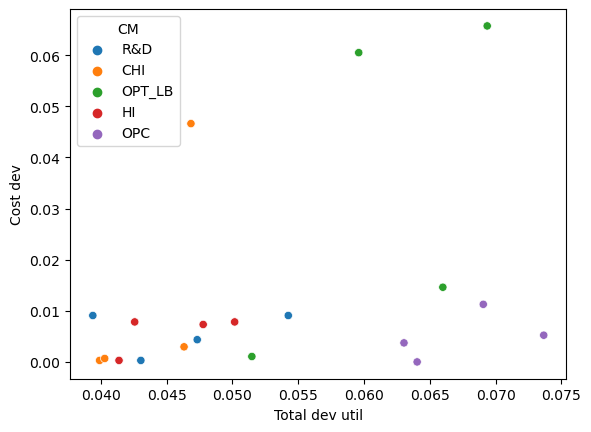

In [4]:
sns.scatterplot(data = df,y = "Cost dev", x="Total dev util",hue="CM")

<Axes: xlabel='Total dev line flows', ylabel='Cost dev'>

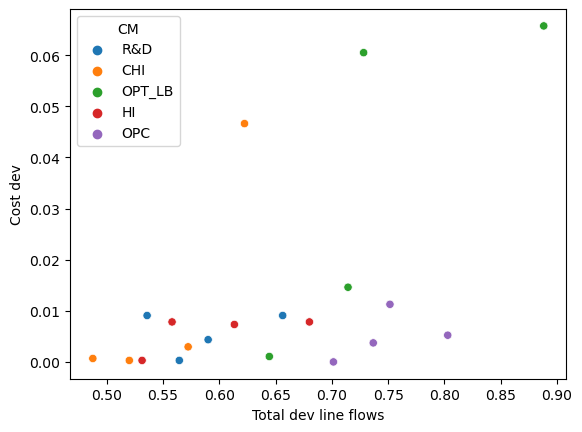

In [5]:
sns.scatterplot(data = df,y = "Cost dev", x="Total dev line flows",hue="CM")

<Axes: xlabel='nbc', ylabel='Cost dev'>

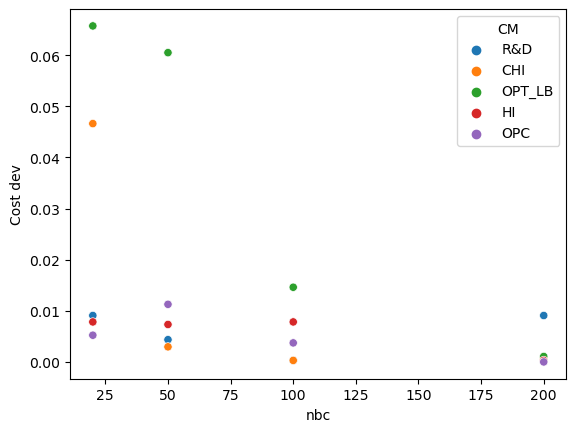

In [6]:
sns.scatterplot(data = df,y = "Cost dev", x="nbc",hue="CM")

In [54]:
df.columns

Index(['CM', 'nbc', 'Cost dev', 'Total dev curt', 'Total dev util',
       'Total dev line flows', 'Total          System Cost',
       'Generation Investment Cost', 'Network    Investment Cost',
       'Generation  Operation Cost', 'Consumption Operation Cost',
       'Emission              Cost', 'Reliability           Cost'],
      dtype='object')

<Axes: xlabel='Generation  Operation Cost', ylabel='Cost dev'>

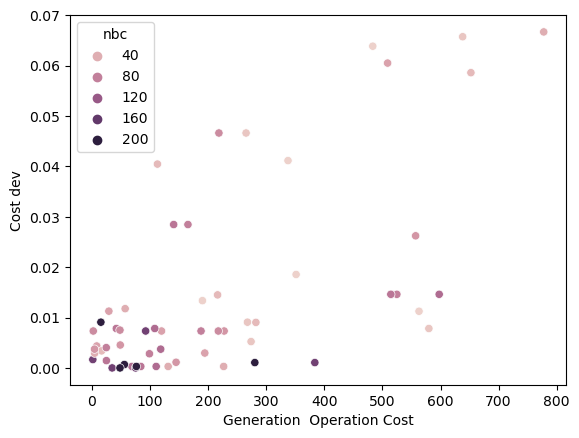

In [26]:
sns.scatterplot(data = df,y = "Cost dev", x="Generation  Operation Cost",hue="nbc")

<Axes: xlabel='Emission              Cost', ylabel='Cost dev'>

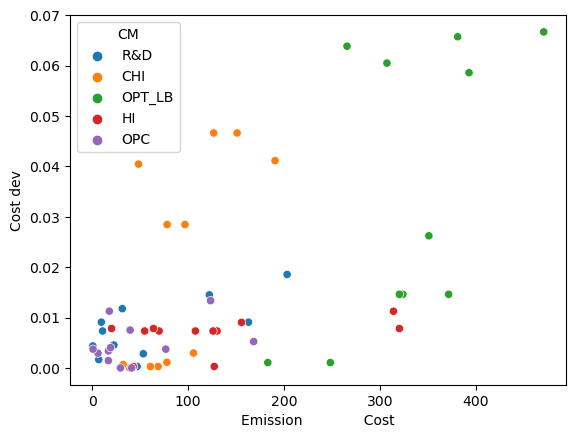

In [19]:
sns.scatterplot(data = df,y = "Cost dev", x="Emission              Cost",hue="CM")

<Axes: xlabel='Reliability           Cost', ylabel='Cost dev'>

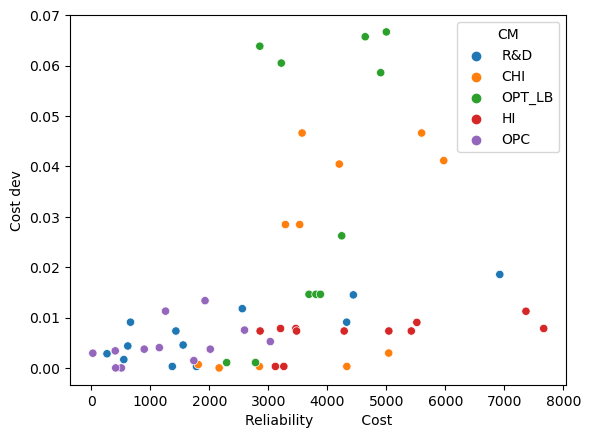

In [21]:
sns.scatterplot(data = df,y = "Cost dev", x="Reliability           Cost",hue="CM")


In [11]:
df["Cost dev"].corr(df["Total dev curt"])

0.5463568319892108

In [12]:
df["Cost dev"].corr(df["Total dev util"])

0.33874419017802126

In [15]:
df["Cost dev"].corr(df["Total dev line flows"])

0.532333579515646

In [24]:
df["Cost dev"].corr(df["Emission              Cost"])

0.6122551959191959

In [23]:
df["Cost dev"].corr(df["Generation  Operation Cost"])

0.6269774646581545

In [22]:
df["Cost dev"].corr(df["Reliability           Cost"])

0.3983948536015236

In [25]:
df["Cost dev"].corr(df["nbc"])

-0.424797310342597

In [38]:
df_cost_FY = pd.read_csv("A.The_full_year_MILP/RTS24_mod1/3.Out/oT_Result_CostSummary_RTS24_mod1.csv")

df_cost_CM = pd.read_csv("J.Full_year_operational_cost/Results/B.Operation_cost/RTS24_mod1_ByStages_nc100/3.Out/oT_Result_CostSummary_RTS24_mod1_ByStages_nc100.csv")

get_total_cost_diff(df_cost_FY,category_dict,cm,100,"RTS24_mod1")
get_cost_diffs(df_cost_FY,category_dict,cm,100,"RTS24_mod1")

NameError: name 'get_total_cost_diff' is not defined

In [15]:
hm.get_cost_diffs(df_cost_FY,cm,nbc,case)

Cost/Payment
Total          System Cost    0.370502
Generation Investment Cost    0.000000
Network    Investment Cost   -0.157845
Generation  Operation Cost   -0.053766
Consumption Operation Cost    0.000000
Emission              Cost    0.582112
Reliability           Cost    0.000000
Name: MEUR, dtype: float64

In [28]:
np.sum(np.abs(x-y))/np.sum(y)

0.058158778996126294

In [30]:
np.min(x)
np.min(y)

0.0020635960050598